In [ ]:
from google.colab import files
uploaded = files.upload()

Saving aviation-accidents.csv to aviation-accidents.csv


In [ ]:
import pandas as pd
df = pd.read_csv('aviation-accidents.csv')

In [ ]:
df.head()

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown


In [ ]:
# Conta il numero di incidenti per nazione
incidenti_per_nazione = df['country'].value_counts()


In [ ]:
# Visualizza i primi 10 risultati
print(incidenti_per_nazione.head(10))



country
USA                4377
Russia             1422
Unknown country     838
U.K.                837
Canada              826
India               700
Brazil              609
France              550
Germany             516
China               514
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

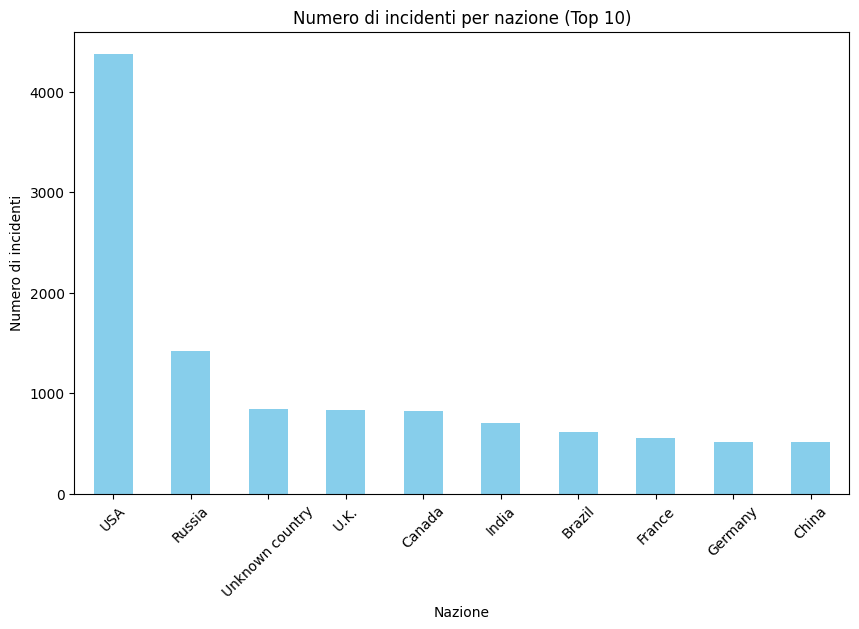

In [ ]:
# Crea un grafico a barre per mostrare il numero di incidenti per nazione
plt.figure(figsize=(10,6))
incidenti_per_nazione.head(10).plot(kind='bar', color='skyblue')
plt.title('Numero di incidenti per nazione (Top 10)')
plt.xlabel('Nazione')
plt.ylabel('Numero di incidenti')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Pulisci e normalizza i formati delle date
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [ ]:
# Rimuovi le righe con date non valide
df = df.dropna(subset=['date'])

In [ ]:
# Estrai il giorno della settimana
df['day_of_week'] = df['date'].dt.day_name()

In [ ]:
# Conta il numero di incidenti per ogni giorno della settimana
incidenti_per_giorno = df['day_of_week'].value_counts()

In [ ]:
# Ordina i giorni della settimana in modo corretto
giorni_ordinati = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
incidenti_per_giorno = incidenti_per_giorno.reindex(giorni_ordinati)

In [ ]:
# Visualizza i risultati
print(incidenti_per_giorno)

day_of_week
Monday       3317
Tuesday      3444
Wednesday    3491
Thursday     3516
Friday       3701
Saturday     3186
Sunday       2753
Name: count, dtype: int64


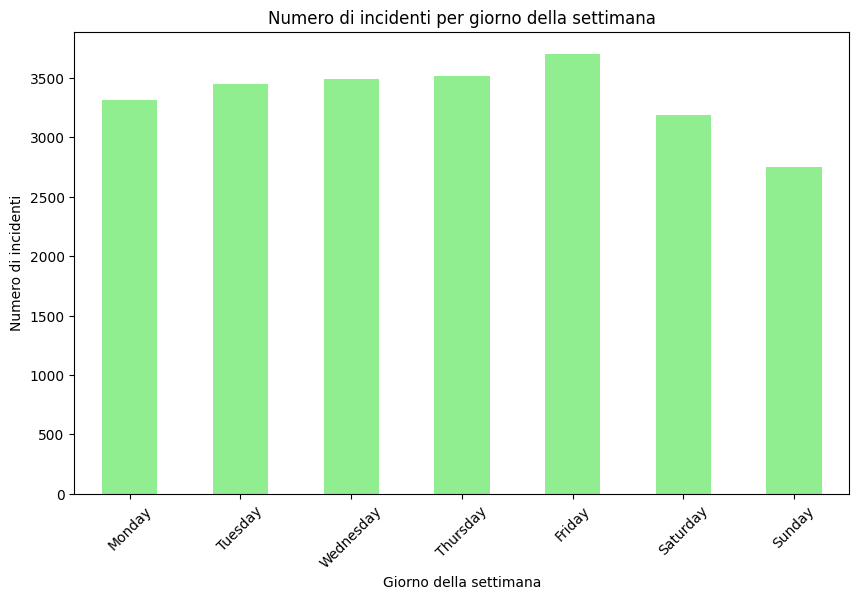

In [ ]:
# Crea un grafico a barre per mostrare il numero di incidenti per giorno della settimana
plt.figure(figsize=(10,6))
incidenti_per_giorno.plot(kind='bar', color='lightgreen')
plt.title('Numero di incidenti per giorno della settimana')
plt.xlabel('Giorno della settimana')
plt.ylabel('Numero di incidenti')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Raggruppa il dataset per tipo di velivolo e calcola la somma delle fatalities per ogni tipo
fatalities_per_tipo = df.groupby('type')['fatalities'].sum()


In [ ]:
# Trova il tipo di velivolo con il maggior numero di morti
tipo_velivolo_massimo_morti = fatalities_per_tipo.idxmax()
massime_morti = fatalities_per_tipo.max()

print(f"Il tipo di velivolo che ha causato il maggior numero di morti è '{tipo_velivolo_massimo_morti}' con un totale di {massime_morti} morti.")

Il tipo di velivolo che ha causato il maggior numero di morti è 'Douglas C-47A (DC-3)' con un totale di 5689.0 morti.


In [ ]:
# Convertiamo la colonna 'date' in formato datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [ ]:
# Dividiamo il dataset in due parti: prima e dopo l'11 settembre 2001
incidenti_prima_911 = df[df['date'] < '2001-09-11']
incidenti_dopo_911 = df[df['date'] >= '2001-09-11']

In [ ]:
# Contiamo il numero di incidenti per ogni periodo
num_incidenti_prima_911 = len(incidenti_prima_911)
num_incidenti_dopo_911 = len(incidenti_dopo_911)


In [ ]:
# Visualizziamo i risultati
print("Numero di incidenti prima dell'11 settembre 2001:", num_incidenti_prima_911)
print("Numero di incidenti dopo l'11 settembre 2001:", num_incidenti_dopo_911)

Numero di incidenti prima dell'11 settembre 2001: 18898
Numero di incidenti dopo l'11 settembre 2001: 4510


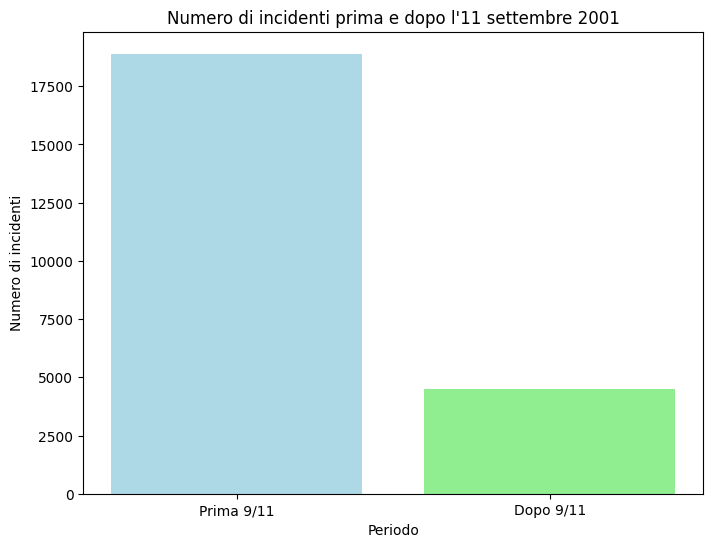

In [ ]:
# Crea un grafico a barre per confrontare il numero di incidenti prima e dopo l'11 settembre 2001
plt.figure(figsize=(8, 6))
plt.bar(['Prima 9/11', 'Dopo 9/11'], [num_incidenti_prima_911, num_incidenti_dopo_911], color=['lightblue', 'lightgreen'])
plt.title('Numero di incidenti prima e dopo l\'11 settembre 2001')
plt.xlabel('Periodo')
plt.ylabel('Numero di incidenti')
plt.show()